Logistic Regression Accuracy: 0.9259925992599259
KNN Accuracy: 0.9704970497049705
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9108 - loss: 0.2888 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.9897 - val_loss: 0.0298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9920 - loss: 0.0262 - val_accuracy: 0.9901 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9947 - loss: 0.0141 - val_accuracy: 0.9908 - val_loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0358
CNN Test Accuracy: 0.990799069404602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


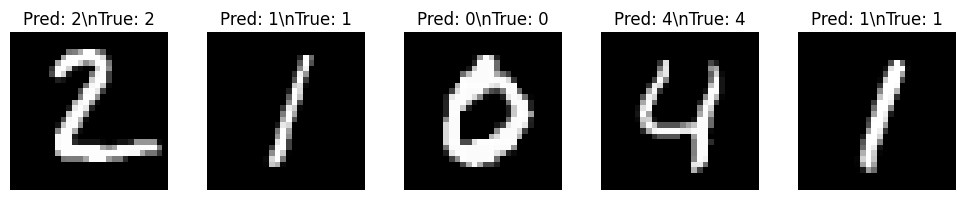

,Model,Accuracy
0,Logistic Regression,0.925993
1,KNN (k=3),0.970497
2,CNN,0.990799


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# Load training and testing data
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# Separate features and labels
X_train_flat = train_df.iloc[:, 1:].values / 255.0
y_train = train_df.iloc[:, 0].values

X_test_flat = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)
lr_preds = lr_model.predict(X_test_flat)
lr_acc = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_acc)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_flat, y_train)
knn_preds = knn_model.predict(X_test_flat)
knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_acc)

# Reshape data for CNN
X_train_cnn = X_train_flat.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_flat.reshape(-1, 28, 28, 1)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train, epochs=5, validation_data=(X_test_cnn, y_test))
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_test_acc)

predictions = cnn_model.predict(X_test_cnn[:5])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_cnn[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

pd.DataFrame({
    "Model": ["Logistic Regression", "KNN (k=3)", "CNN"],
    "Accuracy": [lr_acc, knn_acc, cnn_test_acc]
})